# **Analysis of phihung/titanic Dataset**

---



In [ ]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

# Load the Titanic dataset
dataset = load_dataset('phihung/titanic')
df = dataset['train'].to_pandas()  # Convert to a Pandas DataFrame for easy manipulation

# Display the first few rows to understand the structure
df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/137 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/891 [00:00<?, ? examples/s]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


# **Task: Survival Rate Analysis by Gender**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate survival rate by gender
survival_rate = df.groupby('Sex')['Survived'].mean()

# Display the survival rate for each gender
print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


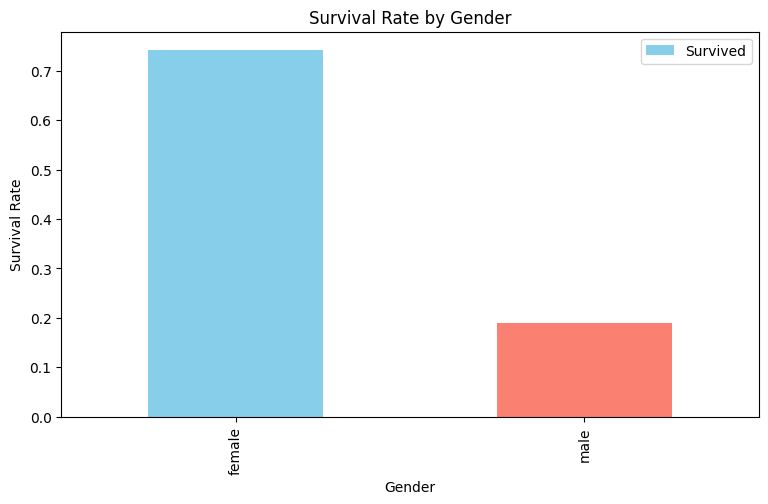

In [ ]:
# Visualization: Bar Plot
plt.figure(figsize=(9, 5))
survival_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()

# **Task 2: Age Distribution of Survivors & Non-survivors**

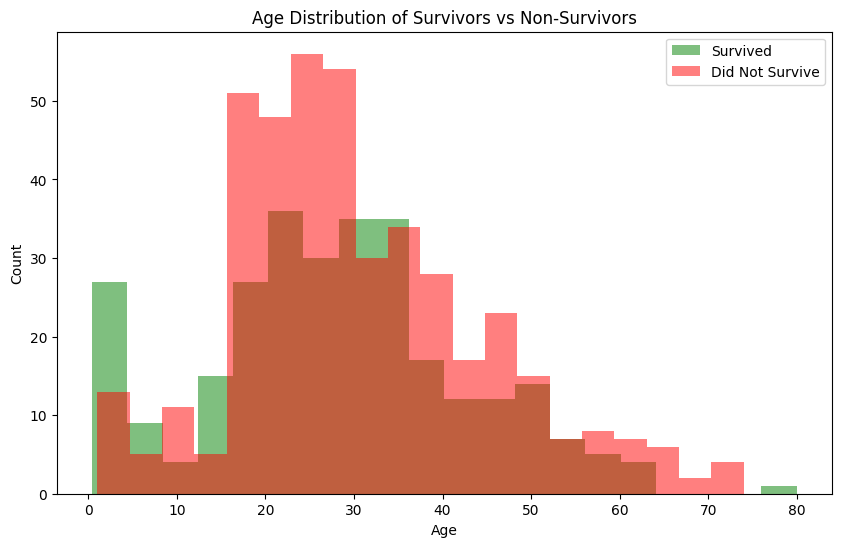

In [ ]:
# Task 2: Age Distribution of Survivors vs Non-Survivors
plt.figure(figsize=(10, 6))
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='green', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='red', label='Did Not Survive')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# **Task 3: Fare Distribution paid by Survival Status**

<Figure size 1000x600 with 0 Axes>

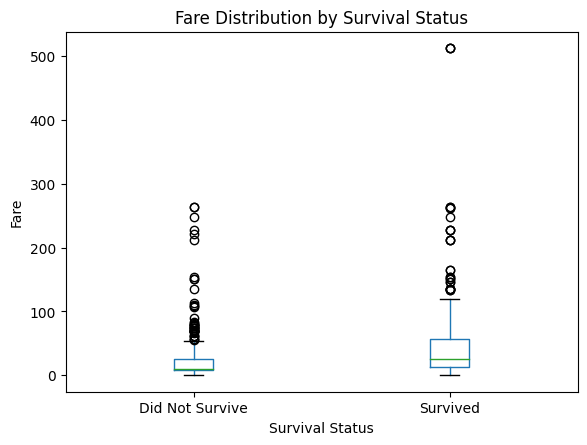

In [ ]:
# Task 3: Fare Distribution of Survivors vs Non-Survivors
plt.figure(figsize=(10, 6))
df.boxplot(column='Fare', by='Survived', grid=False)
plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.xticks([1, 2], ['Did Not Survive', 'Survived'])  # Custom tick labels
plt.show()